In [ ]:
import numpy as np 
import xarray as xr 
from ersstTimeseriesGenerator import timeseries 
from helper import numToMonth
from defaultPlots import scatter, histogram
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import scipy 

In [ ]:
def LOORF(features, targets):
    y_pred_tot = []
    models = []
    for i in range(len(targets)):
        # Exclude the i-th sample for testing (LOO)
        X_test = features[i, :]
        y_test = targets[i]
        features_copy = features.copy()
        targets_copy = targets.copy()

        # Use all other samples for training
        X_train = np.delete(features_copy, i, axis=0)
        y_train = np.delete(targets_copy, i, axis=0)

        # Train the Random Forest model
        model = RandomForestRegressor(
        n_estimators=1000,verbose=0,min_samples_leaf=3)
        
        model.fit(X_train, y_train)
        
        # Gather predictions
        y_pred = model.predict(X_test.reshape(1, -1))
        y_pred_tot.append(y_pred)
        models.append(model[0])

    return np.array(y_pred_tot).squeeze(), model, np.array(models)

In [143]:
def regression(input, output, RF = True): 
    trainIn = input
    trainOut = output
    testIn = input
    testOut = output
   
    if RF == True:
        predictTest, regr, models = LOORF(trainIn, trainOut)
    else:
        regr = linear_model.LinearRegression()
        regr.fit(trainIn, trainOut)
        predictTest = regr.predict(testIn)

    try:
        # importance = regr.feature_importances_
        feats = []
        for r in regr:
            feats.append(r.feature_importances_)
        feats = np.array(feats)
        importance = np.nanmean(feats, axis = 0)
    except:
        coef = np.abs(regr.coef_ * np.nanstd(testIn, axis = 0))
        importance = coef / np.sum(coef)


    corr, sig = scipy.stats.pearsonr(predictTest, testOut)
    # error = np.sqrt(np.mean((predictTest - testOut)**2))
    error = np.mean(np.abs(predictTest - testOut))
    scatter(['Actual ACE', testOut], ['Predicted ACE', predictTest])
    scatter(['Year', year], ['Actual - Predicted ACE', testOut - predictTest], vline = False)

    print(testOut - predictTest)

    print(str(error) + f"mb error\nCorrelation: {corr**2}")

    return models, predictTest, importance, testIn, testOut

In [ ]:
startYear = 1971
endYear = 2024
indexMonth = '6'

In [77]:
lats = [30, 50]
lons = [360 - 30, 360 - 5]
canary_current = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

canary_current2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

In [78]:
lats = [10, 30]
lons = [360 - 30, 360 - 5]
canary_current2 = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

canary_current22025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

In [79]:
lats = [10, 20]
lons = [360 - 60, 360 - 15]
mdr = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

mdr2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

In [80]:
lats = [-10, 10]
lons = [120, 160]
wpac = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

wpac2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

In [81]:
lats = [-10, 10]
lons = [360 - 160, 360 - 100]
enso = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
ensoA = timeseries('4', range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth('4')[0:3]]

enso2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
ensoA2025 = timeseries('4', range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth('4')[0:3]]

ensoDiff = enso - ensoA 
ensoDiff2025 = enso2025 - ensoA2025

In [82]:
lats = [-7.5, 7.5]
lons = [360 - 60, 380]
atlNino = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

atlNino2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

In [83]:
lats = [20, 35]
lons = [130, 170]
npac = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

npac2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

In [84]:
lats = [35, 45]
lons = [170, 360 - 165]
ncpac = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

ncpac2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

In [85]:
lats = [-10, 10]
lons = [35, 65]
iod1 = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
iod12025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]


lats = [-10, 10]
lons = [80, 110]
iod2 = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
iod22025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

iod = iod1 - iod2
iod2025 = iod12025 - iod22025

In [86]:
lats = [-40, -30]
lons = [70, 100]
sio = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

sio2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

In [87]:
lats = [-30, -15]
lons = [65, 85]
sio2 = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

sio22025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

In [88]:
sio = (sio + sio2) / 2
sio2025 = (sio2025 + sio22025) / 2

In [89]:
lats = [-20, -10]
lons = [92.5, 120]
sio3 = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

sio32025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

In [90]:
lats = [10, 30]
lons = [60, 80]
arb = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

arb2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

In [91]:
lats = [10, 20]
lons = [360 - 85, 360 - 50]
car = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
car2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]


lats = [-25, -5]
lons = [360 - 30, 360 - 10]
satl = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
satl2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]

amm = car - satl
amm2025 = car2025 - satl2025

In [119]:
lats = [30, 45]
lons = [360 - 170, 360 - 140]
pdo = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
pdoM = timeseries('5', range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth('5')[0:3]]

pdo2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
pdoM2025 = timeseries('5', range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth('5')[0:3]]

pdoDiff = pdo - pdoM 
pdoDiff2025 = pdo2025 - pdoM2025

In [108]:
lats = [50, 65]
lons = [360 - 165, 360 - 130]
goa = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
goaM = timeseries('5', range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth('5')[0:3]]

goa2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
goaM2025 = timeseries('5', range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth('5')[0:3]]

goaDiff = goa - goaM 
goaDiff2025 = goa2025 - goaM2025

In [126]:
lats = [-10, 10]
lons = [360 - 60, 360 - 35]
smdr = timeseries(indexMonth, range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
smdrM = timeseries('5', range(startYear, endYear + 1), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth('5')[0:3]]

smdr2025 = timeseries(indexMonth, range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth(indexMonth)[0:3]]
smdrM2025 = timeseries('5', range(2025, 2026), slice(lats[1], lats[0]), slice(lons[0], lons[1]), constantClimo = True)[numToMonth('5')[0:3]]

smdrDiff = smdr - smdrM 
smdrDiff2025 = smdr2025 - smdrM2025

In [94]:
from regionalACE import createClimoData

lats = [0, 70]
lons = [360 - 100, 360 - 5]
day = 365

ACE = createClimoData([startYear, endYear], 'AL', lats, [lons[0] - 360, lons[1] - 360])[day]
print(ACE)

['', 'HURDAT2 April 04, 2025', '\r', '    \r', 'AL011851,            UNNAMED,     14,\r', '18510625, 0000,  , HU, 28.0N,  94.8W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510625, 0600,  , HU, 28.0N,  95.4W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510625, 1200,  , HU, 28.0N,  96.0W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510625, 1800,  , HU, 28.1N,  96.5W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510625, 2100, L, HU, 28.2N,  96.8W,  80, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510626, 0000,  , HU, 28.2N,  97.0W,  70, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999\r', '18510626, 0600,  , TS, 28.3N,  97.6W,  60, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -9

In [140]:
xNames = ['Canary Current', 'NPAC', 'ENSO', 'Arabian Sea', 'SATL', 'Western MDR', 'Northern CPAC', 'SIO', 'ENSO June - April', 'PDO June - May']
x = [canary_current, npac, enso, arb, satl, car, ncpac, sio, ensoDiff, pdoDiff - goaDiff]
# xNames = ['Canary Current', 'Canary Current 2', 'NPAC', 'ENSO', 'MDR', 'WPAC', 'Atlantic Nino', 'IOD', 'SIO']
# x = [canary_current, canary_current2, npac, enso, mdr, wpac, atlNino, iod, sio]
y = ACE
year = np.arange(startYear, endYear + 1)

for i in range(len(x)):
    x[i] = x[i].to_numpy()
y = y.to_numpy()

x = np.column_stack(x)

54 (54,)
[[0.52305627]]
17.402499999999996 245.08249999999995


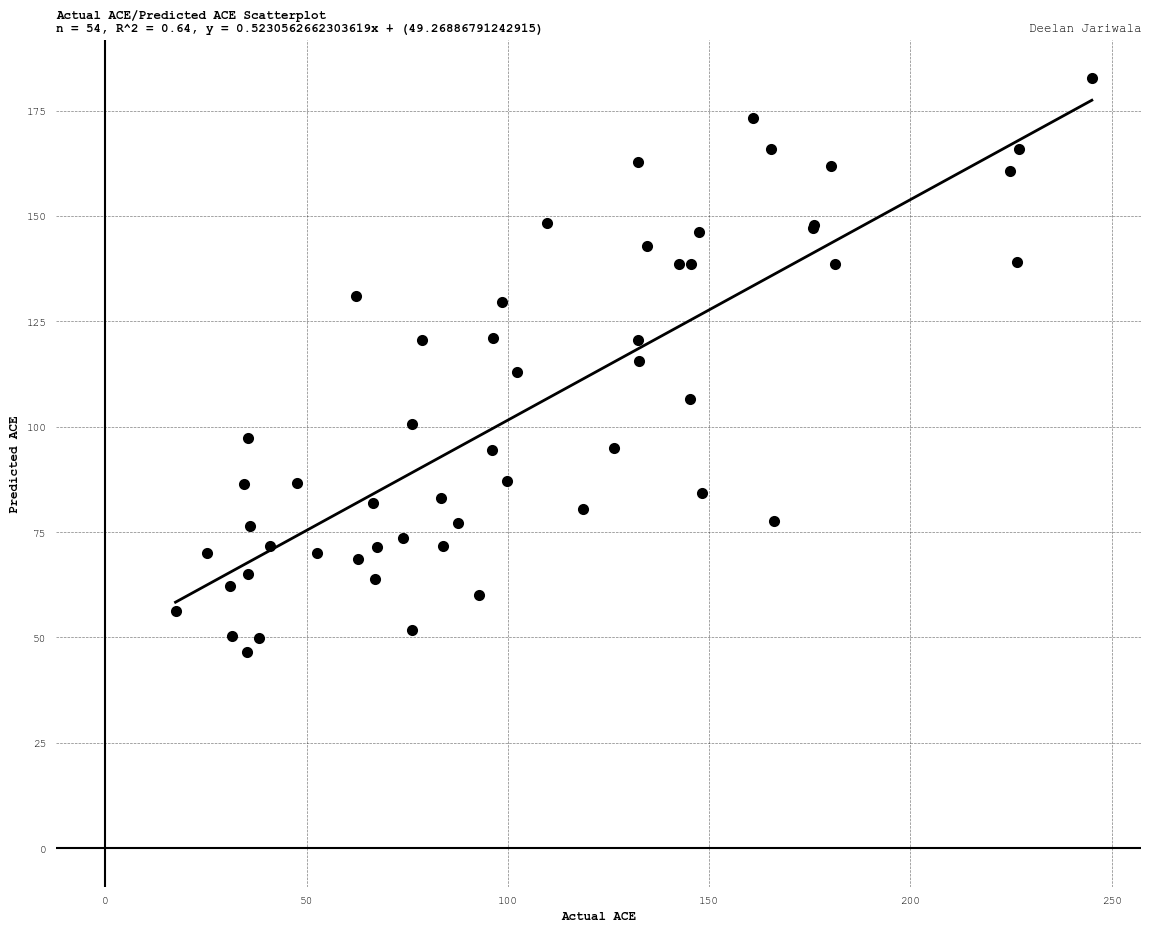

54 (54,)
[[0.26264279]]
1971 2024


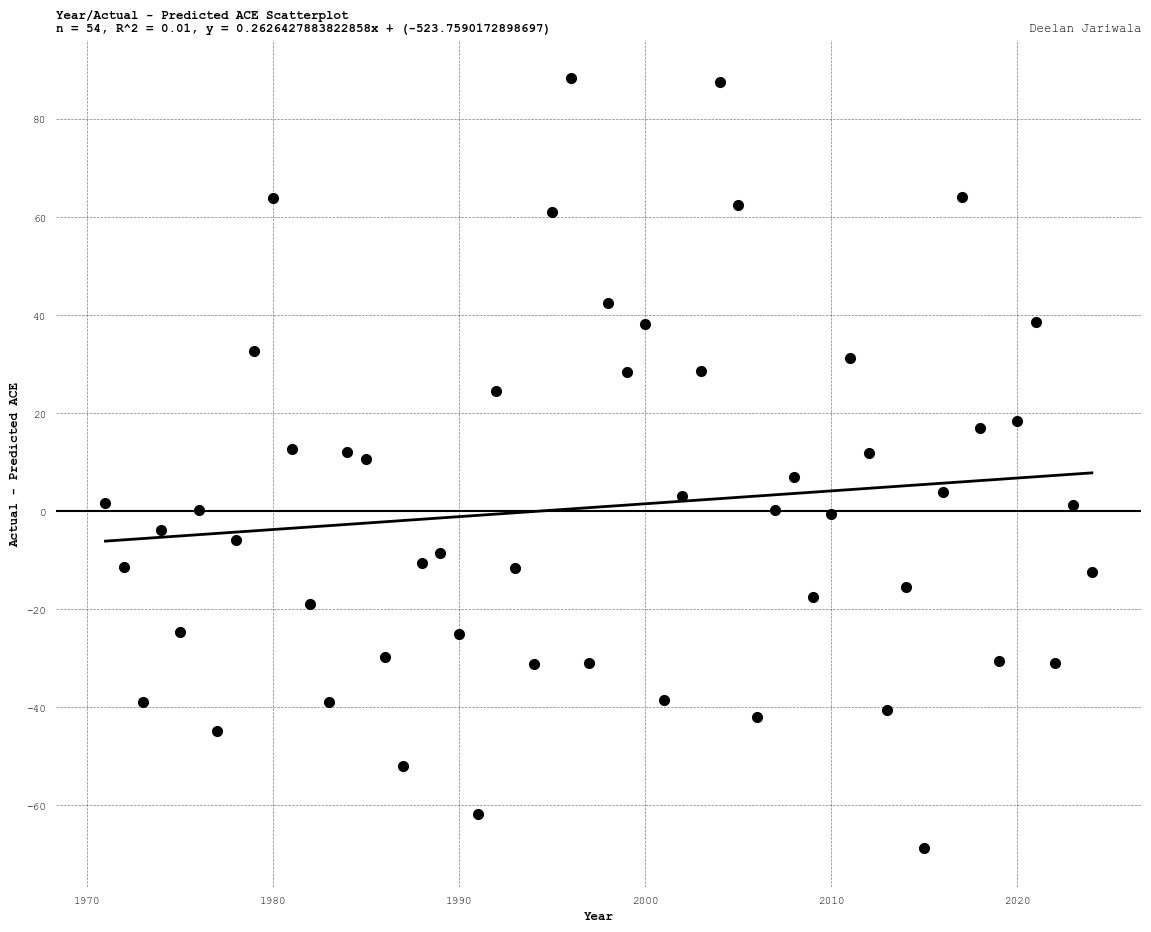

[  1.66406165 -11.31060105 -38.95128298  -3.87315035 -24.67561149
   0.3088422  -44.90087523  -5.88456225  32.7327558   63.95384821
  12.60288576 -18.91018711 -38.83220675  12.14226978  10.63893578
 -29.65104806 -52.01331727 -10.61445016  -8.43036382 -24.96992862
 -61.82550361  24.44067906 -11.52090729 -31.15062143  61.12445595
  88.32547262 -30.9487853   42.55437117  28.31227108  38.10183366
 -38.53020327   3.15846903  28.69914239  87.46170043  62.39835655
 -42.01177431   0.33136832   6.98902937 -17.56280187  -0.64447243
  31.35969343  11.86345764 -40.47076911 -15.40577454 -68.72935125
   4.02100587  64.09601886  16.94879235 -30.63723709  18.48391418
  38.62306322 -30.94225817   1.36562087 -12.32683521]
28.48939250459547mb error
Correlation: 0.6414037243908539


Feature:                      Canary Current, Importance: 0.535474982189757
Feature:                                NPAC, Importance: 0.07662633538577421
Feature:                                ENSO, Importance: 0.071396809164

In [144]:
regr, predictions, feat, testIn, testOut = regression(x, y, RF = True)
print('\n')
feat = dict(zip(xNames, feat))
# Print one key-value pair at a time
for key, value in feat.items():
    print(f"Feature: {key:>35}, Importance: {value}")
print('\n')

for i in range(len(year)):
    print(year[i], testOut[i], predictions[i], (testOut[i] - predictions[i]))

In [ ]:
import shap
import matplotlib.pyplot as plt

model = regr[9]

# Initialize SHAP 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x)

fig, ax = plt.subplots(figsize=(10, 5))
shap.summary_plot(shap_values, x, feature_names=xNames, show=False)
plt.title("Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

In [ ]:
def shapPlot(index):
    xFeatShap = x[index][np.newaxis, :]

    shap_values_x = explainer.shap_values(xFeatShap)[0]

    explanation_x = shap.Explanation(values=shap_values_x, base_values=explainer.expected_value, data=x[index], feature_names=xNames)

    shap.plots.waterfall(explanation_x, show=False)
    plt.title("Zonal Tilt Feature Importance (SHAP)")
    plt.tight_layout()
    plt.show()

In [ ]:
shapPlot(9)

In [146]:
# x2025 = [canary_current2025, canary_current22025, npac2025, enso2025, mdr2025, wpac2025, atlNino2025, iod2025, sio2025]
x2025 = [canary_current2025, npac2025, enso2025, arb2025, satl2025, car2025, ncpac2025, sio2025, ensoDiff2025, pdoDiff2025 - goaDiff2025]
for i in range(len(x2025)):
    x2025[i] = x2025[i].to_numpy()

x2025 = np.column_stack(x2025)

In [147]:
print(regr.shape)
allpred2025 = []
for rfModel in regr:
    allpred2025.append(rfModel.predict(x2025))

allpred2025 = np.array(allpred2025)

(54,)


[[111.54833333]
 [194.6135    ]
 [126.82333333]
 [157.46875   ]
 [200.68833333]
 [145.96583333]
 [147.81625   ]
 [133.66083333]
 [106.113     ]
 [204.57194444]
 [232.13083333]
 [157.57821429]
 [149.900625  ]
 [196.8       ]
 [146.78166667]
 [154.605     ]
 [157.54583333]
 [226.22125   ]
 [134.12791667]
 [114.910625  ]
 [165.0705    ]
 [121.2185    ]
 [226.474     ]
 [141.94916667]
 [215.91833333]
 [168.785625  ]
 [147.3034375 ]
 [150.77892857]
 [137.78107143]
 [162.74392857]
 [189.92      ]
 [ 98.319375  ]
 [228.23964286]
 [100.5021875 ]
 [190.8375    ]
 [107.0275    ]
 [174.510625  ]
 [202.22875   ]
 [214.9875    ]
 [174.46875   ]
 [219.755     ]
 [230.853125  ]
 [205.70392857]
 [174.41      ]
 [131.2105    ]
 [162.35375   ]
 [160.66821429]
 [179.49214286]
 [194.27958333]
 [178.3475    ]
 [196.05357143]
 [171.7240625 ]
 [126.429     ]
 [143.9975    ]] 166.55954212595532 162.54883928571428


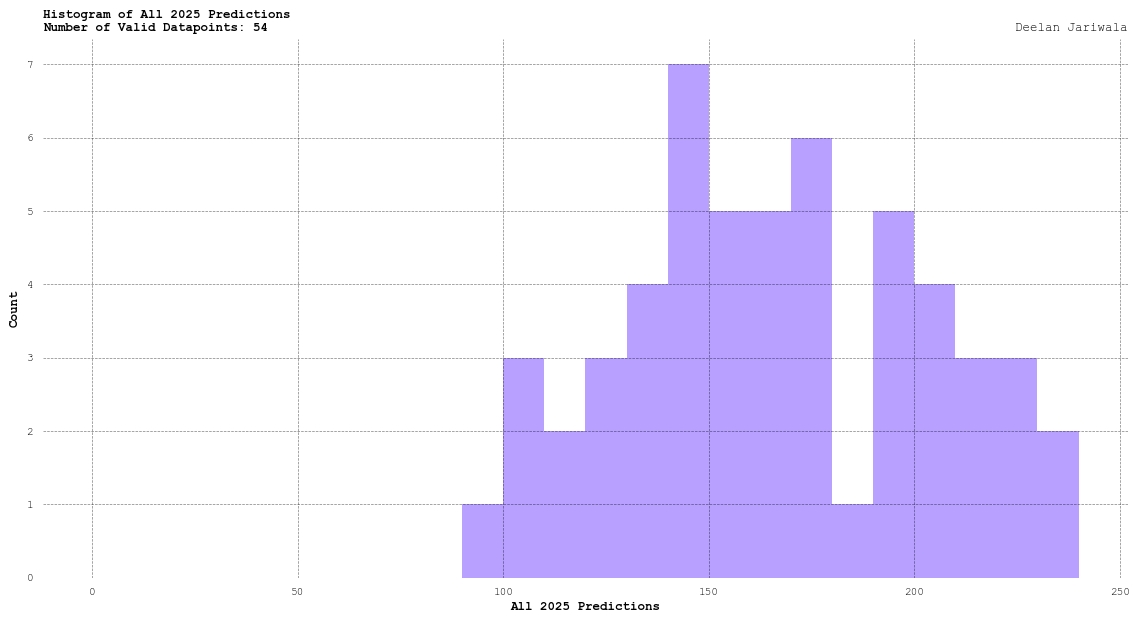

In [148]:
print(allpred2025, np.nanmean(allpred2025), np.nanmedian(allpred2025))

histogram(['All 2025 Predictions', allpred2025], bounds = [0, 250, 10])

In [ ]:
import xarray as xr 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
import cartopy
import numpy as np 
import cmaps as cmap 
import pandas as pd 
from helper import numToMonth
import scipy.stats
from scipy.signal import detrend
import matplotlib as mpl
from ersstTimeseriesGenerator import timeseries 
from regionalACE import createClimoData
from correlationPCA import pcaSeries
import psl
import helper
from scipy.ndimage import gaussian_filter
mpl.rcParams['hatch.linewidth'] = 0.5
mpl.rcParams['font.family'] = 'Courier New'

def map(interval, labelsize):
    fig = plt.figure(figsize=(14, 6))

    # Add the map and set the extent
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_frame_on(False)
    
    # Add state boundaries to plot
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth = 0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth = 0.25)
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth = 0.25)
    ax.set_xticks(np.arange(-180, 181, interval), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, interval), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
    ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())

    ax.tick_params(axis='both', labelsize=labelsize, left = False, bottom = False)
    ax.grid(linestyle = '--', which = 'major', alpha = 0.5, color = 'black', linewidth = 0.5, zorder = 9)
    # ax.grid(linestyle = '--', which = 'minor', alpha = 0.5, color = 'black', linewidth = 0.5, zorder = 9)
    # ax.minorticks_on()
    return ax 

In [ ]:
ERSSTDATA = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc')
dataset1 = ERSSTDATA
print(dataset1)
dataset = dataset1['sst']
DATA = dataset.fillna(0) * np.cos(np.radians(dataset['lat']))
print(DATA)

6 [  1.66406165 -11.31060105 -38.95128298  -3.87315035 -24.67561149
   0.3088422  -44.90087523  -5.88456225  32.7327558   63.95384821
  12.60288576 -18.91018711 -38.83220675  12.14226978  10.63893578
 -29.65104806 -52.01331727 -10.61445016  -8.43036382 -24.96992862
 -61.82550361  24.44067906 -11.52090729 -31.15062143  61.12445595
  88.32547262 -30.9487853   42.55437117  28.31227108  38.10183366
 -38.53020327   3.15846903  28.69914239  87.46170043  62.39835655
 -42.01177431   0.33136832   6.98902937 -17.56280187  -0.64447243
  31.35969343  11.86345764 -40.47076911 -15.40577454 -68.72935125
   4.02100587  64.09601886  16.94879235 -30.63723709  18.48391418
  38.62306322 -30.94225817   1.36562087 -12.32683521]
(54, 16020) (54,)


C:\Users\deela\AppData\Local\Temp\ipykernel_28624\2247625275.py:24: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, sig = scipy.stats.pearsonr(temp[:, i], csv)


(16020,)
[260, 360] [0, 0]
[360, 360] [0, 70]
[360, 260] [70, 70]
[260, 260] [70, 0]


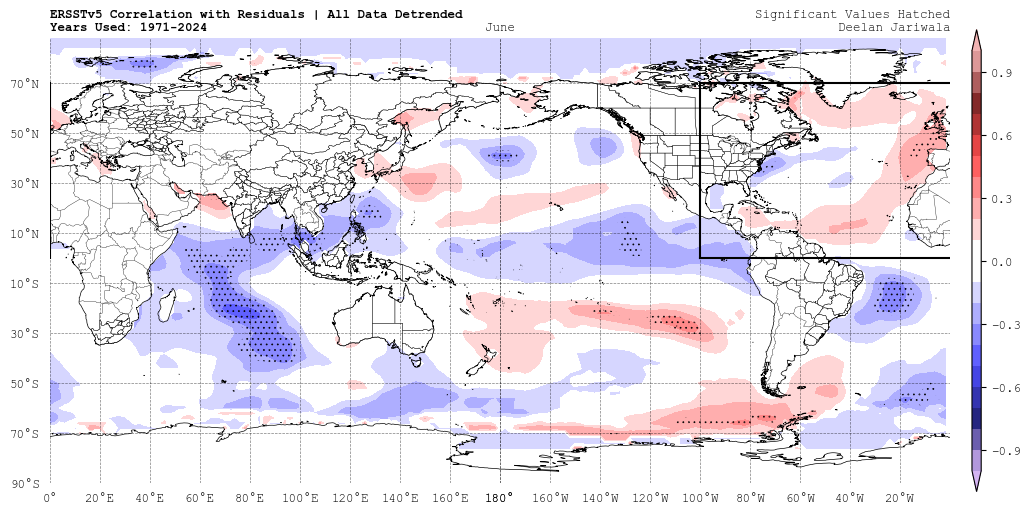

In [149]:
index = 'Residuals'
dataMonth = indexMonth
dataMonth = '6'
lats = [0, 70]
lons = [360 - 100, 360 - 0]
boxXCoords = [lons[0], lons[1], lons[1], lons[0], lons[0]]
boxYCoords = [lats[0], lats[0], lats[1], lats[1], lats[0]]
csv = testOut - predictions
print(dataMonth, csv)

fMonths = np.array([np.datetime64(f'{y}-{str(dataMonth).zfill(2)}-01') for y in range(startYear, endYear + 1)])
data = DATA.sel(time = fMonths)
ogShape = data.shape

temp = data.values
temp = np.reshape(temp, (ogShape[0], ogShape[1] * ogShape[2]))
temp = detrend(temp, axis = 0)
print(temp.shape, csv.shape)

corrData = []
signData = []
for i in range(temp.shape[1]):
    temp[:, i] = np.nan_to_num(temp[:, i])
    corr, sig = scipy.stats.pearsonr(temp[:, i], csv)
    corrData.append(corr)
    signData.append(sig)

print(np.array(corrData).shape)
data = data.mean('time')
data.values = np.reshape(corrData, (ogShape[1], ogShape[2]))
dataset1['sig'] = ((ogShape[1], ogShape[2]), np.reshape(signData, (ogShape[1], ogShape[2])))

ax = map(20, 9)
# ax.set_extent([180, 359.9, 0, 70], crs = ccrs.PlateCarree())
try:
    c = plt.contourf(data.longitude, data.latitude, data.values, cmap = cmap.tempAnoms3(), levels = np.arange(-1, 1.1, .1), extend = 'both', transform = ccrs.PlateCarree(central_longitude = 0))
    # c = plt.pcolormesh(data.longitude, data.latitude, data.values, cmap = cmap.tempAnoms3(), vmin = -1, vmax = 1.1, transform = ccrs.PlateCarree(central_longitude = 0))
    h = plt.contourf(data.longitude, data.latitude, dataset1['sig'].values, colors = 'none', levels = np.arange(0, 0.06, 0.01), hatches = ['...'], transform = ccrs.PlateCarree(central_longitude = 0))
except:
    c = plt.contourf(data.lon, data.lat, data.values, cmap = cmap.tempAnoms3(), levels = np.arange(-1, 1.1, .1), extend = 'both', transform = ccrs.PlateCarree(central_longitude = 0))
    # c = plt.pcolormesh(data.lon, data.lat, data.values, cmap = cmap.tempAnoms3().reversed(), vmin = -1, vmax = 1.1, transform = ccrs.PlateCarree(central_longitude = 0))
    h = plt.contourf(data.lon, data.lat, dataset1['sig'].values, colors = 'none', levels = np.arange(0, 0.06, 0.01), hatches = ['...'], transform = ccrs.PlateCarree(central_longitude = 0))

try:
    for y in range(len(boxXCoords)):
        try:
            print([boxXCoords[y], boxXCoords[y + 1]], [boxYCoords[y], boxYCoords[y + 1]])
            ax.plot([boxXCoords[y], boxXCoords[y + 1]], [boxYCoords[y], boxYCoords[y + 1]], color = 'black', zorder = 20, transform = ccrs.PlateCarree(central_longitude = 360))
        except:
            pass
except:
    pass

try:
    for collection in h.collections:
        collection.set_edgecolor('#262626')
        collection.set_linewidth(0)
except:
    pass

# ax.set_title(f'NCEP/NCAR R1 850mb Zonal Wind Correlation with {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
# ax.set_title(f'ERSSTv5 Correlation with {numToMonth(indexMonth)} {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
#ax.set_title(f'AMSU Tropopause (TTS) Brightness Temp. Correlation with {numToMonth(indexMonth)} {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
ax.set_title(f'ERSSTv5 Correlation with {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
# ax.set_title(f'HURDAT2 ACE Density Correlation with {numToMonth(indexMonth)} {index.upper()}\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
ax.set_title(f'{numToMonth(dataMonth)}', fontsize=9, loc='center') 
ax.set_title(f'Significant Values Hatched\nDeelan Jariwala', fontsize=9, loc='right') 
cbar = plt.colorbar(c, orientation = 'vertical', aspect = 50, pad = .02)
cbar.ax.tick_params(axis='both', labelsize=9, left = False, bottom = False)
# plt.savefig(r"C:\Users\deela\Downloads\correlationPlot" + dataMonth + "_" + index + ".png", dpi = 400, bbox_inches = 'tight')
plt.show()

54 (54,)
[[1.26098949]]
-70.58234586873532 87.93812838414013


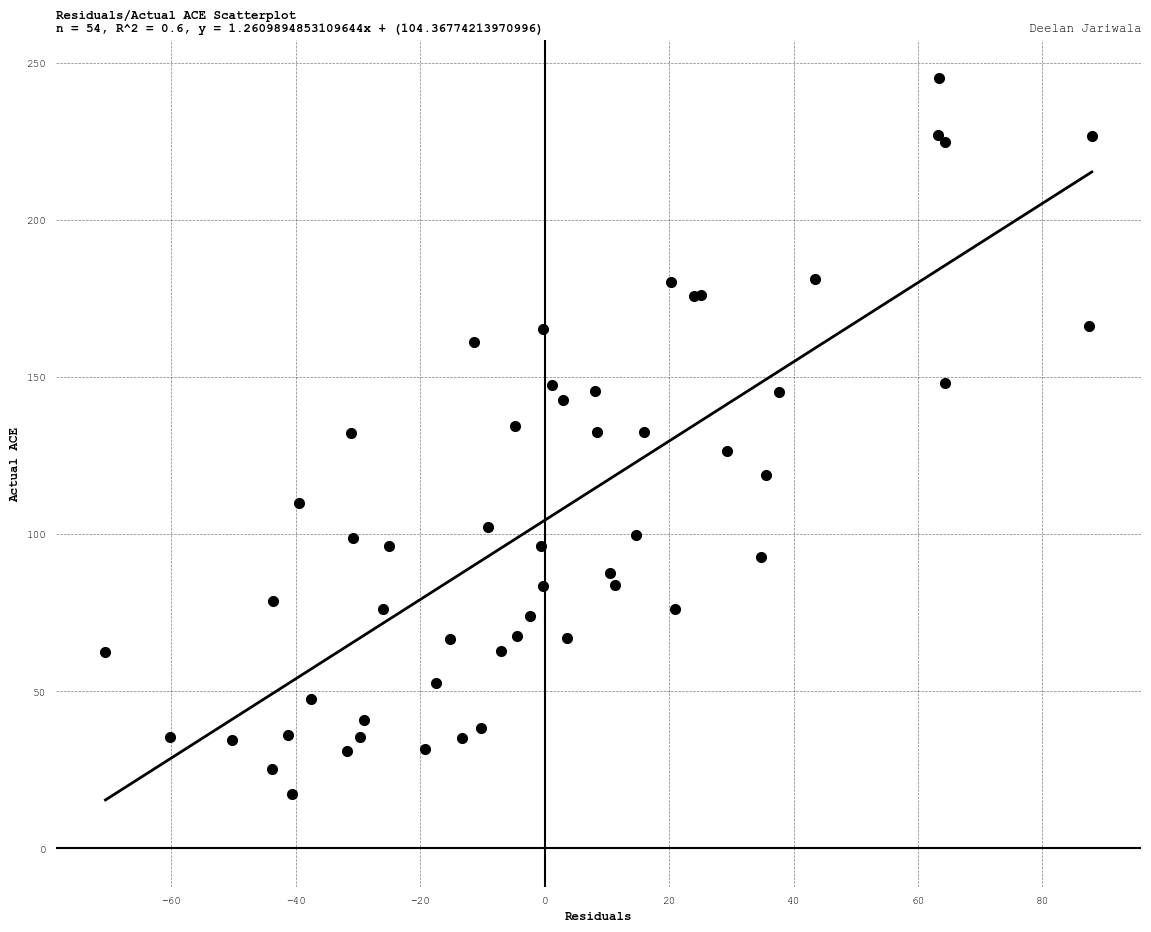

In [145]:
scatter(['Residuals', csv], ['Actual ACE', testOut])

6 [ -0.57690892 -13.21604674 -37.61111195  -4.51436355 -25.93836836
  -0.31309512 -43.77940357  -7.03602012  34.83105381  64.39949917
  14.69802022 -19.15789714 -40.63076508  11.31410771  10.53354764
 -29.65182486 -50.3203375   -9.11627919  -4.74582257 -25.07187801
 -60.23849544  20.98230194 -10.2924525  -31.70912444  63.25291663
  87.49667212 -29.08463768  43.42547597  25.18596262  35.62518541
 -39.47019249   3.59854506  24.08032256  87.93812838  63.44039455
 -43.59642628  -2.29032409   8.01129993 -17.47660949  -0.30722431
  29.29464154   8.36843303 -41.21193639 -15.28360979 -70.58234587
   2.97910745  64.31885041  15.93984591 -31.11586858  20.30927858
  37.70648803 -30.81437827   1.19345724 -11.33143271]
(54, 16020) (54,)


C:\Users\deela\AppData\Local\Temp\ipykernel_28624\2854081395.py:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, sig = scipy.stats.pearsonr(temp[:, i], csv)


(16020,)
[215, 240] [15, 15]
[240, 240] [15, 35]
[240, 215] [35, 35]
[215, 215] [35, 15]


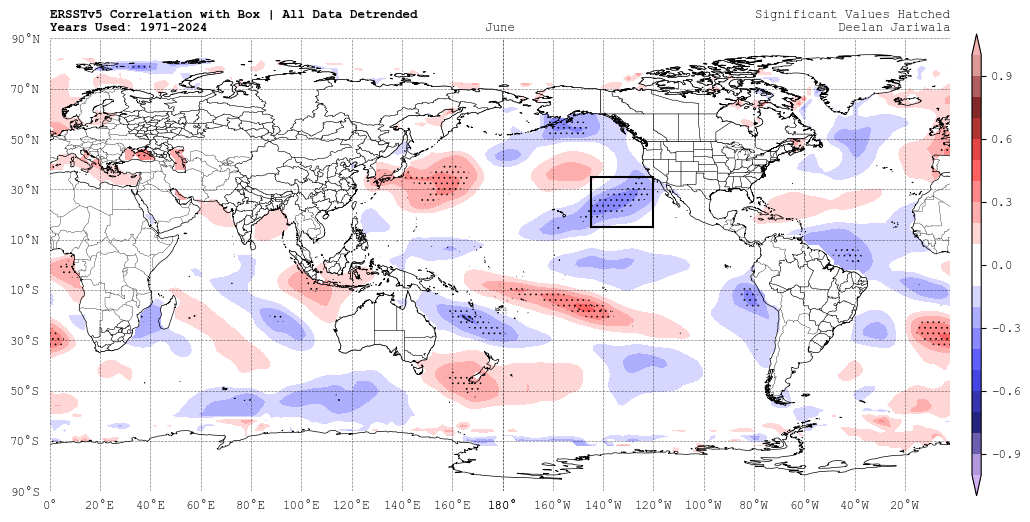

In [ ]:
index = 'Residuals'
dataMonth = indexMonth
dataMonth = '6'
lats = [15, 35]
lons = [360 - 145, 360 - 120]
boxXCoords = [lons[0], lons[1], lons[1], lons[0], lons[0]]
boxYCoords = [lats[0], lats[0], lats[1], lats[1], lats[0]]
csv = testOut - predictions
print(dataMonth, csv)

fMonths = np.array([np.datetime64(f'{y}-{str(dataMonth).zfill(2)}-01') for y in range(startYear, endYear + 1)])
fMonths2 = np.array([np.datetime64(f'{y}-{str(5).zfill(2)}-01') for y in range(startYear, endYear + 1)])
data = DATA.sel(time = fMonths)
data.values = data.values - DATA.sel(time = fMonths2)
ogShape = data.shape

temp = data.values
temp = np.reshape(temp, (ogShape[0], ogShape[1] * ogShape[2]))
temp = detrend(temp, axis = 0)
print(temp.shape, csv.shape)

corrData = []
signData = []
for i in range(temp.shape[1]):
    temp[:, i] = np.nan_to_num(temp[:, i])
    corr, sig = scipy.stats.pearsonr(temp[:, i], csv)
    corrData.append(corr)
    signData.append(sig)

print(np.array(corrData).shape)
data = data.mean('time')
data.values = np.reshape(corrData, (ogShape[1], ogShape[2]))
dataset1['sig'] = ((ogShape[1], ogShape[2]), np.reshape(signData, (ogShape[1], ogShape[2])))

ax = map(20, 9)
# ax.set_extent([180, 359.9, 0, 70], crs = ccrs.PlateCarree())
try:
    c = plt.contourf(data.longitude, data.latitude, data.values, cmap = cmap.tempAnoms3(), levels = np.arange(-1, 1.1, .1), extend = 'both', transform = ccrs.PlateCarree(central_longitude = 0))
    # c = plt.pcolormesh(data.longitude, data.latitude, data.values, cmap = cmap.tempAnoms3(), vmin = -1, vmax = 1.1, transform = ccrs.PlateCarree(central_longitude = 0))
    h = plt.contourf(data.longitude, data.latitude, dataset1['sig'].values, colors = 'none', levels = np.arange(0, 0.06, 0.01), hatches = ['...'], transform = ccrs.PlateCarree(central_longitude = 0))
except:
    c = plt.contourf(data.lon, data.lat, data.values, cmap = cmap.tempAnoms3(), levels = np.arange(-1, 1.1, .1), extend = 'both', transform = ccrs.PlateCarree(central_longitude = 0))
    # c = plt.pcolormesh(data.lon, data.lat, data.values, cmap = cmap.tempAnoms3().reversed(), vmin = -1, vmax = 1.1, transform = ccrs.PlateCarree(central_longitude = 0))
    h = plt.contourf(data.lon, data.lat, dataset1['sig'].values, colors = 'none', levels = np.arange(0, 0.06, 0.01), hatches = ['...'], transform = ccrs.PlateCarree(central_longitude = 0))

try:
    for y in range(len(boxXCoords)):
        try:
            print([boxXCoords[y], boxXCoords[y + 1]], [boxYCoords[y], boxYCoords[y + 1]])
            ax.plot([boxXCoords[y], boxXCoords[y + 1]], [boxYCoords[y], boxYCoords[y + 1]], color = 'black', zorder = 20, transform = ccrs.PlateCarree(central_longitude = 360))
        except:
            pass
except:
    pass

try:
    for collection in h.collections:
        collection.set_edgecolor('#262626')
        collection.set_linewidth(0)
except:
    pass

# ax.set_title(f'NCEP/NCAR R1 850mb Zonal Wind Correlation with {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
# ax.set_title(f'ERSSTv5 Correlation with {numToMonth(indexMonth)} {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
#ax.set_title(f'AMSU Tropopause (TTS) Brightness Temp. Correlation with {numToMonth(indexMonth)} {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
ax.set_title(f'ERSSTv5 Correlation with {index} | All Data Detrended\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
# ax.set_title(f'HURDAT2 ACE Density Correlation with {numToMonth(indexMonth)} {index.upper()}\nYears Used: {startYear}-{endYear}', fontweight='bold', fontsize=9, loc='left')
ax.set_title(f'{numToMonth(dataMonth)}', fontsize=9, loc='center') 
ax.set_title(f'Significant Values Hatched\nDeelan Jariwala', fontsize=9, loc='right') 
cbar = plt.colorbar(c, orientation = 'vertical', aspect = 50, pad = .02)
cbar.ax.tick_params(axis='both', labelsize=9, left = False, bottom = False)
# plt.savefig(r"C:\Users\deela\Downloads\correlationPlot" + dataMonth + "_" + index + ".png", dpi = 400, bbox_inches = 'tight')
plt.show()